In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import requests

In [ ]:
df = pd.read_csv('Diwali-Sales-Data.csv', encoding='ISO-8859-1')

In [ ]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [ ]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


In [ ]:
df['User_ID'].nunique()

3755

In [ ]:
df['State'].unique()

array(['Maharashtra', 'Andhra\xa0Pradesh', 'Uttar Pradesh', 'Karnataka',
       'Gujarat', 'Himachal Pradesh', 'Delhi', 'Madhya Pradesh',
       'Jharkhand', 'Kerala', 'Haryana', 'Bihar', 'Rajasthan',
       'Uttarakhand', 'Telangana', 'Punjab'], dtype=object)

In [ ]:
df['State'].nunique()

16

In [ ]:
df.isna().sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [ ]:
df.drop(['Status', 'unnamed1'], inplace = True, axis = 1)
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [ ]:
df.dropna(inplace=True)

<Axes: xlabel='State'>

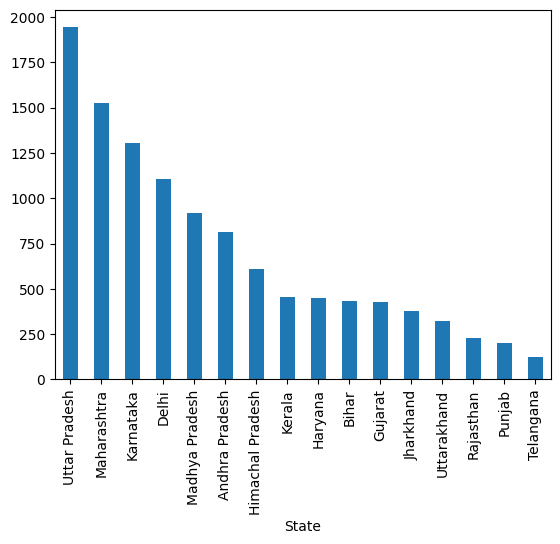

In [ ]:
state_count = df['State'].value_counts()
state_count.plot(kind = 'bar')

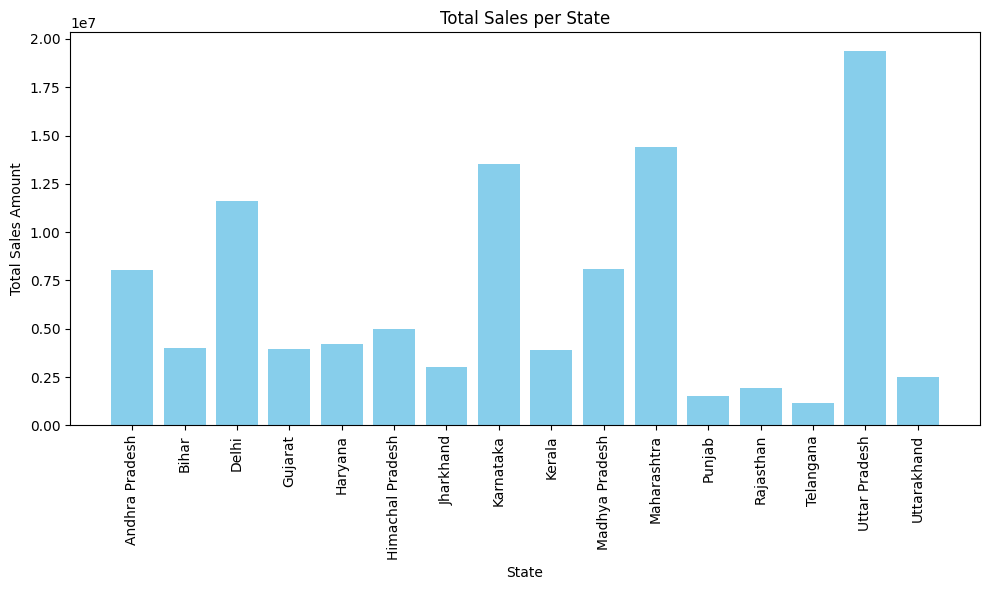

In [ ]:
total_sales_per_state = df.groupby('State')['Amount'].sum().reset_index()
total_sales_per_state.columns = ['State', 'Total_Sales']

# Bar chart for total sales by state
plt.figure(figsize=(10, 6))
plt.bar(total_sales_per_state['State'], total_sales_per_state['Total_Sales'], color='skyblue')
plt.title('Total Sales per State')
plt.xlabel('State')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

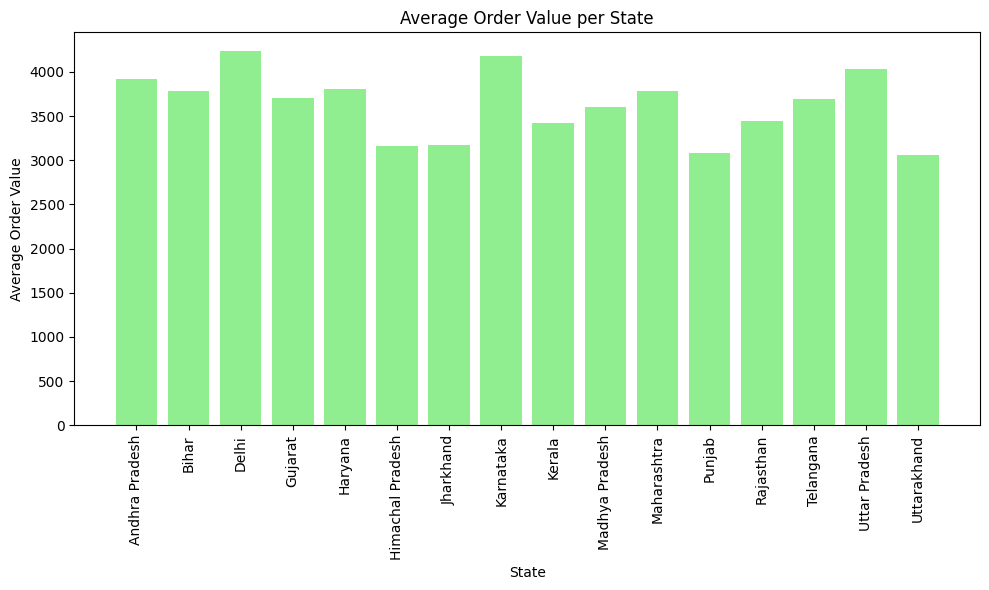

In [ ]:
average_order_value = df.groupby('State').agg({'Amount': 'sum', 'Orders': 'sum'}).reset_index()
average_order_value['Average_Order_Value'] = average_order_value['Amount'] / average_order_value['Orders']
average_order_value = average_order_value[['State', 'Average_Order_Value']]

# Bar chart for average order value by state
plt.figure(figsize=(10, 6))
plt.bar(average_order_value['State'], average_order_value['Average_Order_Value'], color='lightgreen')
plt.title('Average Order Value per State')
plt.xlabel('State')
plt.ylabel('Average Order Value')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
average_order_value

,State,Average_Order_Value
0,Andhra Pradesh,3918.647972
1,Bihar,3787.906780
2,Delhi,4234.970602
3,Gujarat,3701.765478
4,Haryana,3805.387737
5,Himachal Pradesh,3165.413265
6,Jharkhand,3175.714586
7,Karnataka,4173.932099
8,Kerala,3425.234820
9,Madhya Pradesh,3597.309947


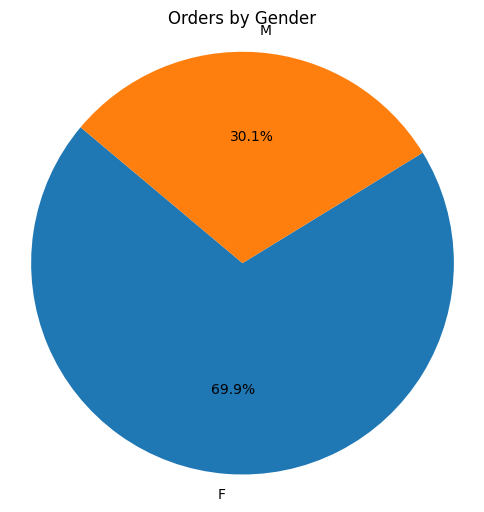

In [ ]:
# Orders by Gender
orders_by_gender = df.groupby('Gender')['Orders'].sum().reset_index()

# Pie chart for orders by gender
plt.figure(figsize=(6, 6))
plt.pie(orders_by_gender['Orders'], labels=orders_by_gender['Gender'], autopct='%1.1f%%', startangle=140)
plt.title('Orders by Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

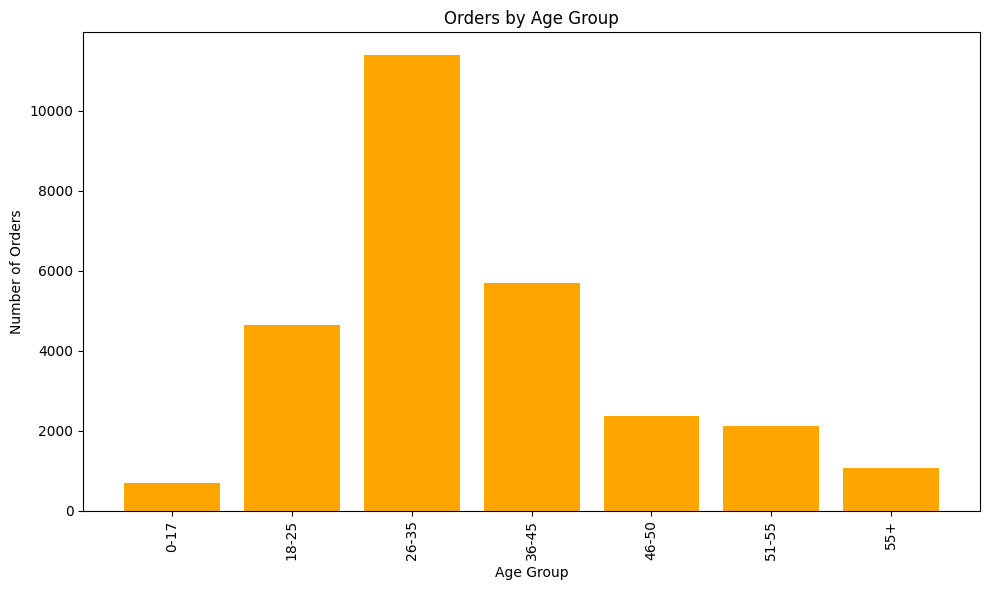

In [ ]:
# Orders by Age Group
orders_by_age_group = df.groupby('Age Group')['Orders'].sum().reset_index()

# Bar chart for orders by age group
plt.figure(figsize=(10, 6))
plt.bar(orders_by_age_group['Age Group'], orders_by_age_group['Orders'], color='orange')
plt.title('Orders by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

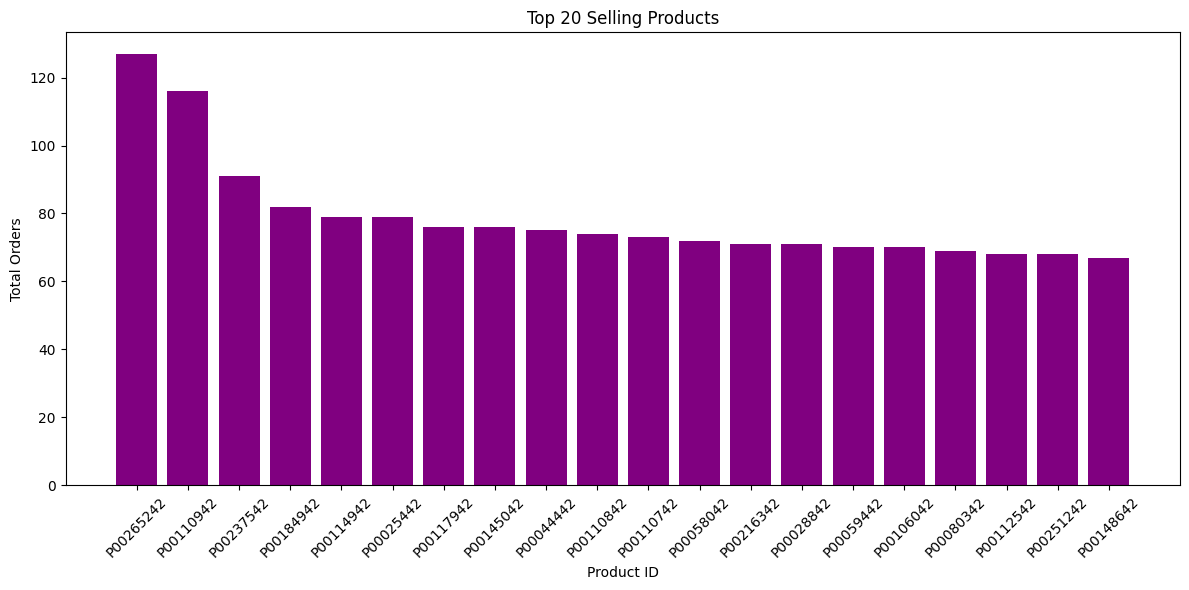

In [ ]:
# Top-selling products
top_products = df.groupby('Product_ID')['Orders'].sum().reset_index()
top_products.columns = ['Product_ID', 'Total_Orders']
top_products = top_products.sort_values(by='Total_Orders', ascending=False)

# Get the top 29 products
top_20_products = top_products.head(20)

# Bar chart for top-selling products
plt.figure(figsize=(12, 6))
plt.bar(top_20_products['Product_ID'], top_20_products['Total_Orders'], color='purple')
plt.title('Top 20 Selling Products')
plt.xlabel('Product ID')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

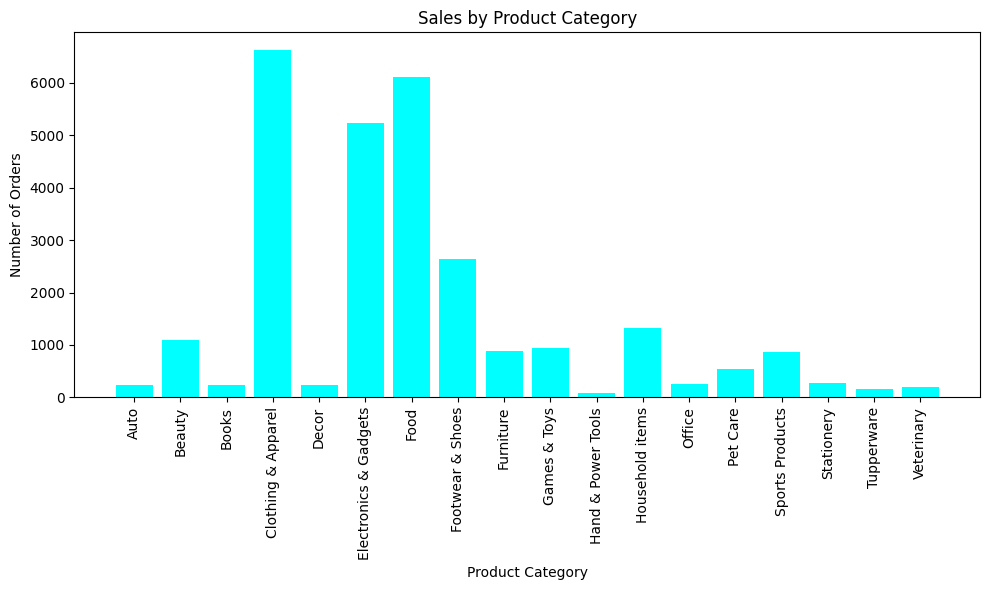

In [ ]:
# Sales by Product Category
sales_by_category = df.groupby('Product_Category').agg({'Orders': 'sum', 'Amount': 'sum'}).reset_index()

# Bar chart for sales by product category
plt.figure(figsize=(10, 6))
plt.bar(sales_by_category['Product_Category'], sales_by_category['Orders'], color='cyan')
plt.title('Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

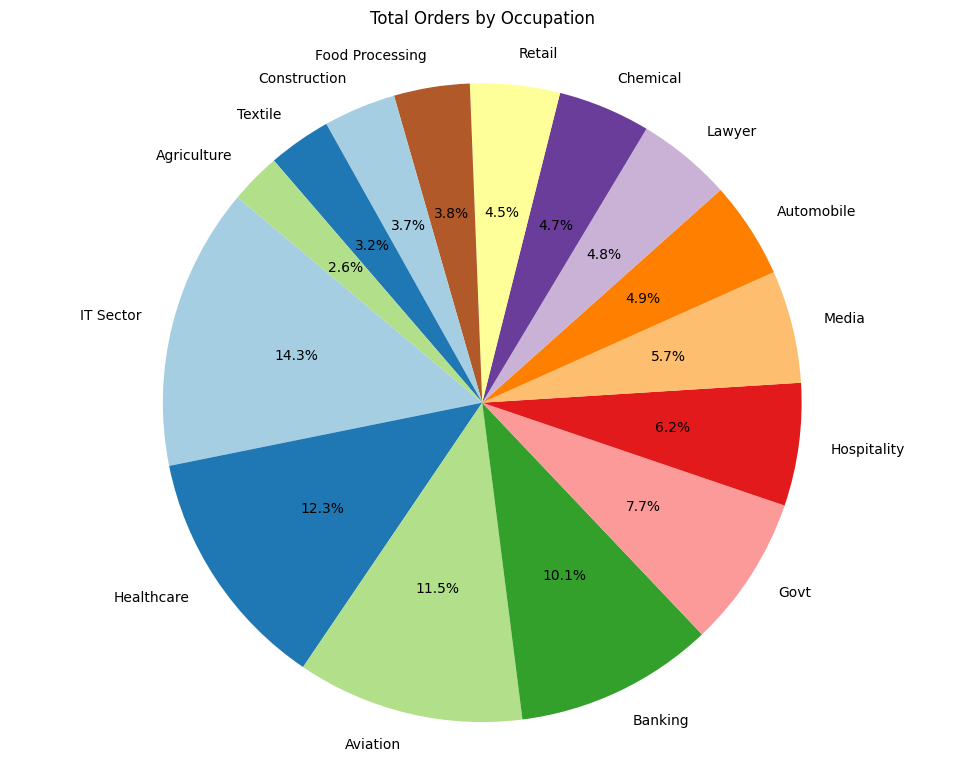

In [ ]:
occupation_orders = df.groupby('Occupation')['Orders'].sum().reset_index()
occupation_orders.columns = ['Occupation', 'Total_Orders']

# Sort values by Total Orders
occupation_orders = occupation_orders.sort_values(by='Total_Orders', ascending=False)

# Pie chart for orders by occupation
plt.figure(figsize=(10, 8))
plt.pie(
    occupation_orders['Total_Orders'],
    labels=occupation_orders['Occupation'],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors
)
plt.title('Total Orders by Occupation', pad=20)  # Add padding to title
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout(pad=2)  # Add some padding around the plot

plt.show()

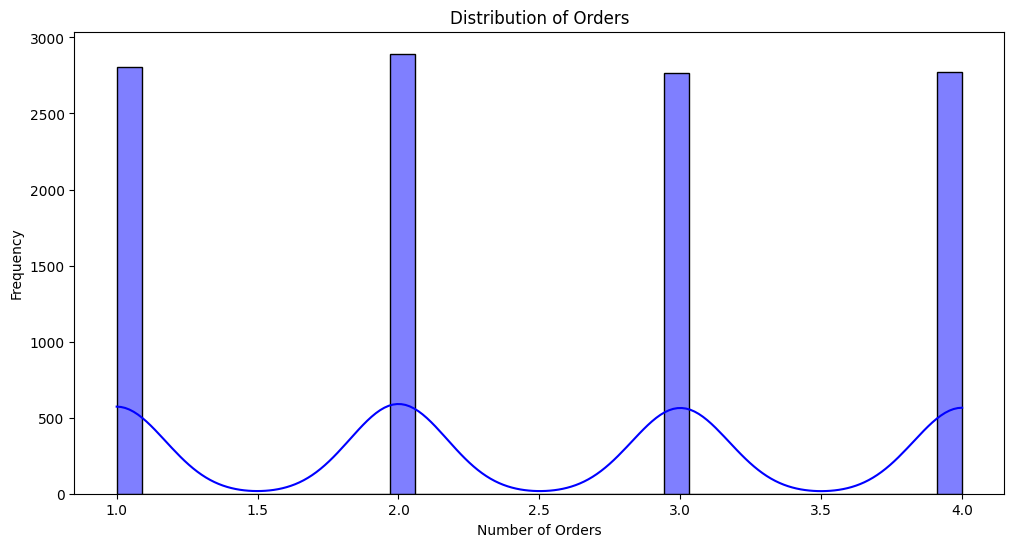

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Orders'], kde=True, color='blue')
plt.title('Distribution of Orders')
plt.xlabel('Number of Orders')
plt.ylabel('Frequency')
plt.show()

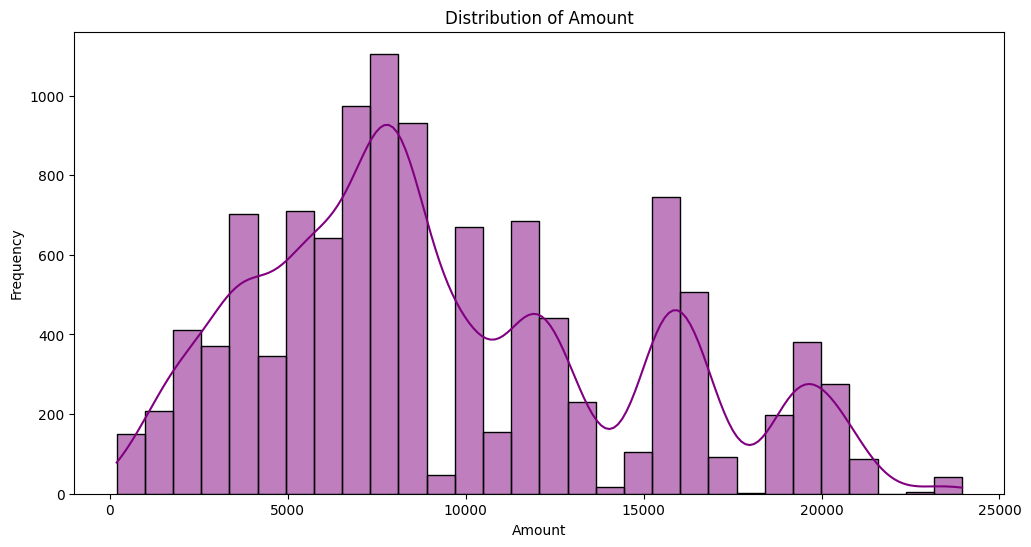

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Amount'], bins=30, kde=True, color='purple')
plt.title('Distribution of Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

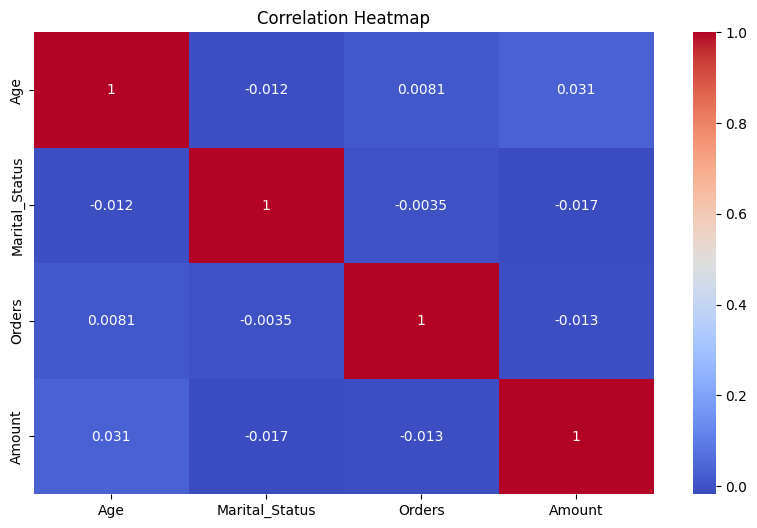

In [ ]:
numeric_columns = ['Age', 'Marital_Status', 'Orders', 'Amount']
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

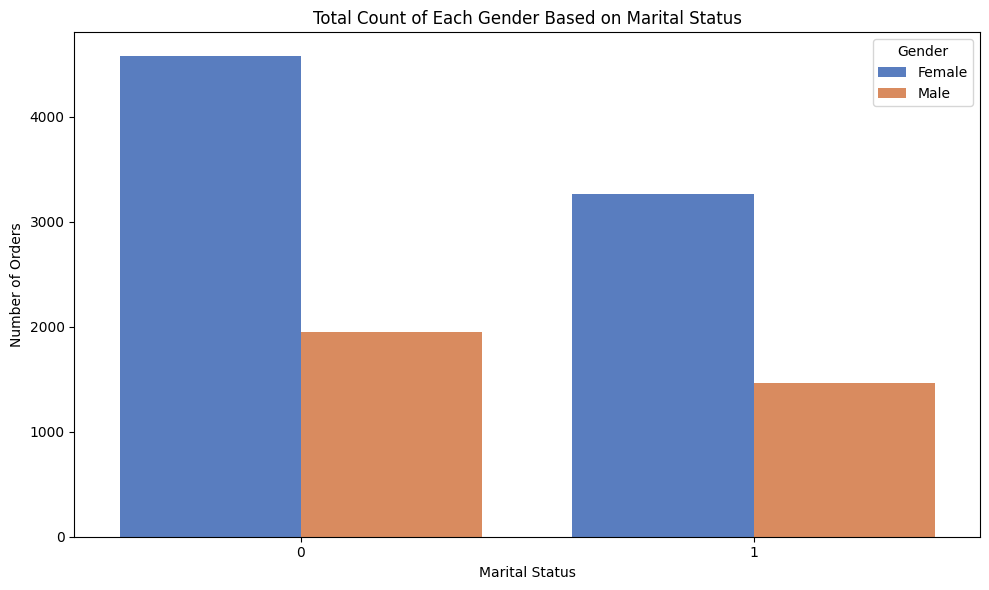

In [ ]:
ms = df.groupby(['Marital_Status', 'Gender']).size().reset_index(name='counts').sort_values('counts', ascending=False)

# Replace values for better readability
ms['Marital_Status'] = ms['Marital_Status'].replace({'0': 'Not Married', '1': 'Married'})
ms['Gender'] = ms['Gender'].replace({'F': 'Female', 'M': 'Male'})

# Create a grouped bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=ms, x='Marital_Status', y='counts', hue='Gender', palette='muted')

# Update layout for better aesthetics
plt.title("Total Count of Each Gender Based on Marital Status")
plt.xlabel('Marital Status')
plt.ylabel('Number of Orders')
plt.legend(title='Gender')
plt.tight_layout()

# Show the figure
plt.show()

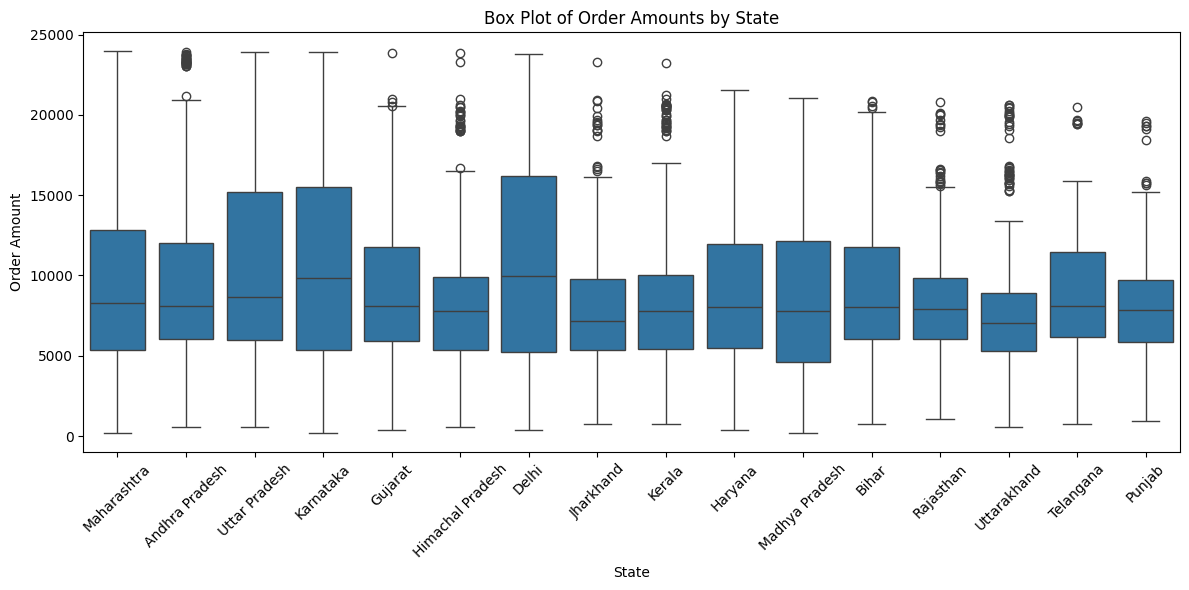

In [ ]:
# Box plot for Amount by State
plt.figure(figsize=(12, 6))
sns.boxplot(x='State', y='Amount', data=df)
plt.title('Box Plot of Order Amounts by State')
plt.xlabel('State')
plt.ylabel('Order Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

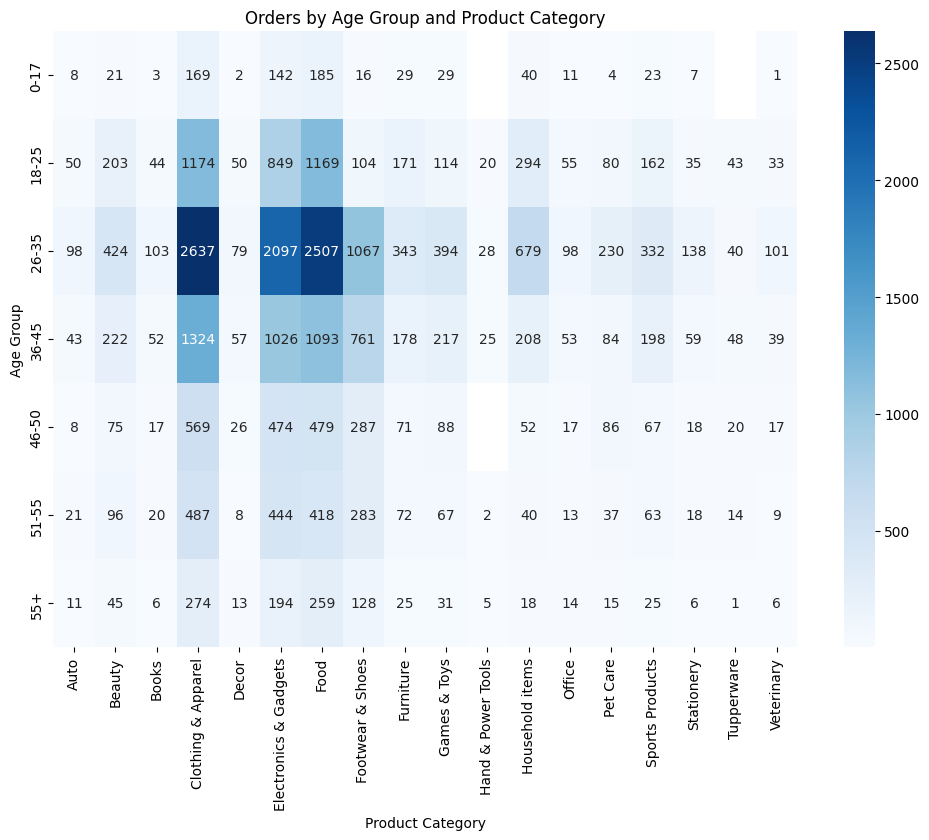

In [ ]:
# Group by Age Group and Product Category
multi_group_orders = df.groupby(['Age Group', 'Product_Category'])['Orders'].sum().unstack()

# Heatmap for multivariate analysis
plt.figure(figsize=(12, 8))
sns.heatmap(multi_group_orders, cmap='Blues', annot=True, fmt='g')
plt.title('Orders by Age Group and Product Category')
plt.xlabel('Product Category')
plt.ylabel('Age Group')
plt.show()

<ipython-input-27-4d3d83746bfa>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=zone_orders, x='Zone', y='Total_Orders', palette='viridis')


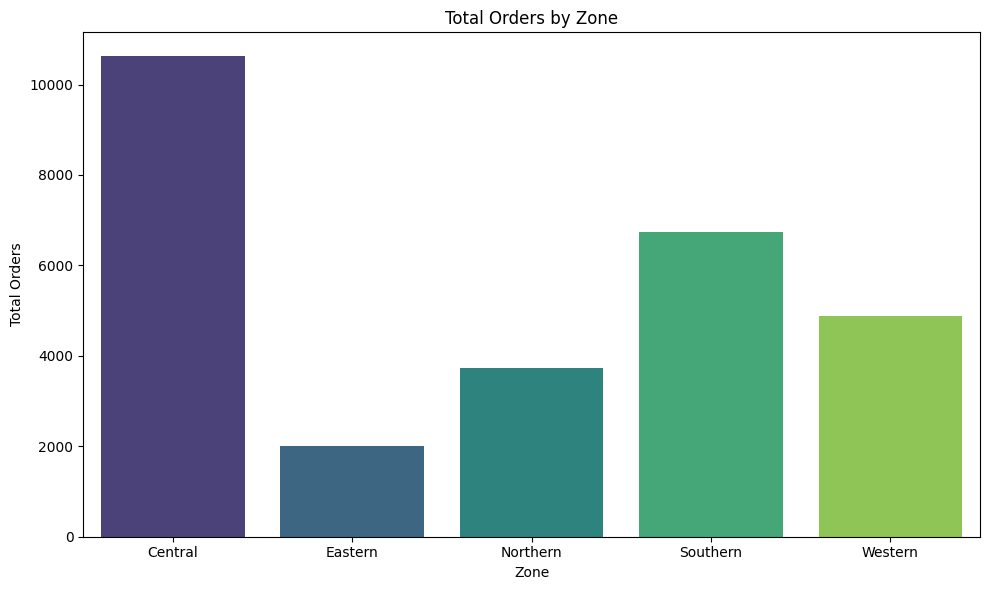

In [ ]:
zone_orders = df.groupby('Zone')['Orders'].sum().reset_index()
zone_orders.columns = ['Zone', 'Total_Orders']

# Create a grouped bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=zone_orders, x='Zone', y='Total_Orders', palette='viridis')

# Update layout for better aesthetics
plt.title("Total Orders by Zone")
plt.xlabel('Zone')
plt.ylabel('Total Orders')
plt.tight_layout()

# Show the figure
plt.show()

<ipython-input-28-62cee3b79e70>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_sales, x='Product_Category', y='Total_Sales', palette='viridis')


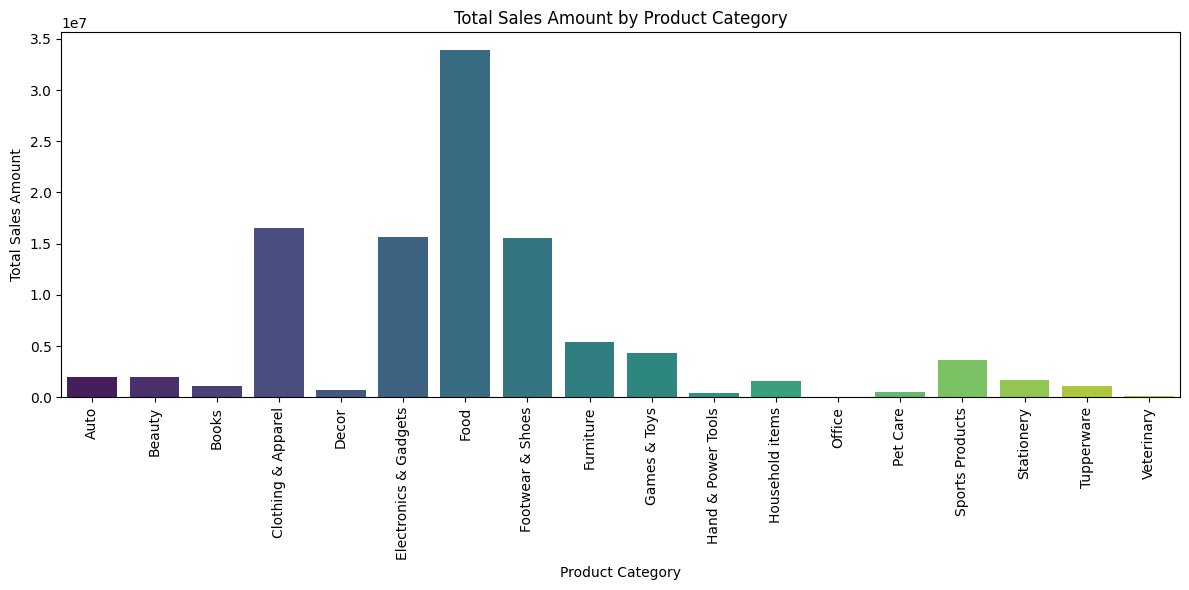

In [ ]:
category_sales = df.groupby('Product_Category')['Amount'].sum().reset_index()
category_sales.columns = ['Product_Category', 'Total_Sales']

# Bar chart for total sales by product category
plt.figure(figsize=(12, 6))
sns.barplot(data=category_sales, x='Product_Category', y='Total_Sales', palette='viridis')
plt.title('Total Sales Amount by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To make sure we are working with an unchanged df we reload the df
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/MpykN-nosN1Sn19AVgzEOg/Diwali-Sales-Data.csv', encoding='ISO-8859-1')

# Drop unnecessary columns and handle NaN values
df = df.drop(columns=['User_ID', 'Cust_name', 'Product_ID', 'Status', 'unnamed1', 'Zone', 'Orders'], errors='ignore')
df = df.dropna()  # Drop rows with NaN values

# Select the features for clustering (excluding `Amount` as it is our target to cluster on)
clustering_features = ['Gender', 'Age', 'Marital_Status', 'Occupation', 'State', 'Product_Category']

# Define preprocessing steps for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Age']),  # Scale numerical features (only `Age` here)
        ('cat', OneHotEncoder(drop='first'), ['Gender', 'Marital_Status', 'Occupation', 'State', 'Product_Category'])  # Encode categorical features
    ])

# Create a pipeline that includes preprocessing and KMeans clustering
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=4, random_state=42))  # Adjust n_clusters based on optimal selection
])

# Fit the pipeline on the selected features
pipeline.fit(df[clustering_features])

# Add the cluster labels to the original DataFrame
df['Demographic_Cluster'] = pipeline.predict(df[clustering_features])

# View cluster sizes to understand the distribution of data points across clusters
cluster_sizes = df['Demographic_Cluster'].value_counts()

# Calculate and display the mean values for `Amount` by cluster to understand spending behavior
amount_summary = df.groupby('Demographic_Cluster')['Amount'].mean()

# Calculate and display the mean values for numeric features by cluster for interpretability
numeric_columns = ['Age']
cluster_summary = df.groupby('Demographic_Cluster')[numeric_columns].mean()

# Analyze categorical features within each cluster
categorical_columns = ['Gender', 'Marital_Status', 'Occupation', 'State', 'Product_Category']
categorical_summary = {}

for col in categorical_columns:
    categorical_summary[col] = df.groupby('Demographic_Cluster')[col].value_counts(normalize=True)

# Set display options to avoid truncation
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Do not truncate based on width

# Display Cluster Sizes
print("Cluster Sizes:")
print(df['Demographic_Cluster'].value_counts())

# Display mean values for `Amount` by cluster
print("\nAverage Amount Spent by Cluster:")
print(df.groupby('Demographic_Cluster')['Amount'].mean())

# Display mean values for numeric features by cluster
print("\nCluster Summary (Mean of Numeric Columns):")
print(df.groupby('Demographic_Cluster')['Age'].mean())

# Display proportions of each categorical feature within each cluster
print("\nCategorical Summary by Cluster (Proportion of each category):")
for col in ['Gender', 'Marital_Status', 'Occupation', 'State', 'Product_Category']:
    print(f"\n{col}:\n{df.groupby('Demographic_Cluster')[col].value_counts(normalize=True)}")

Cluster Sizes:
Demographic_Cluster
2    4579
3    3069
1    2003
0    1588
Name: count, dtype: int64

Average Amount Spent by Cluster:
Demographic_Cluster
0     7503.680101
1     6212.605592
2    11285.459474
3     9844.679211
Name: Amount, dtype: float64

Cluster Summary (Mean of Numeric Columns):
Demographic_Cluster
0    29.889169
1    29.629556
2    28.916139
3    51.729554
Name: Age, dtype: float64

Categorical Summary by Cluster (Proportion of each category):

Gender:
Demographic_Cluster  Gender
0                    F         0.707809
                     M         0.292191
1                    F         0.698452
                     M         0.301548
2                    F         0.705831
                     M         0.294169
3                    F         0.676768
                     M         0.323232
Name: proportion, dtype: float64

Marital_Status:
Demographic_Cluster  Marital_Status
0                    0                 0.562343
                     1                 0

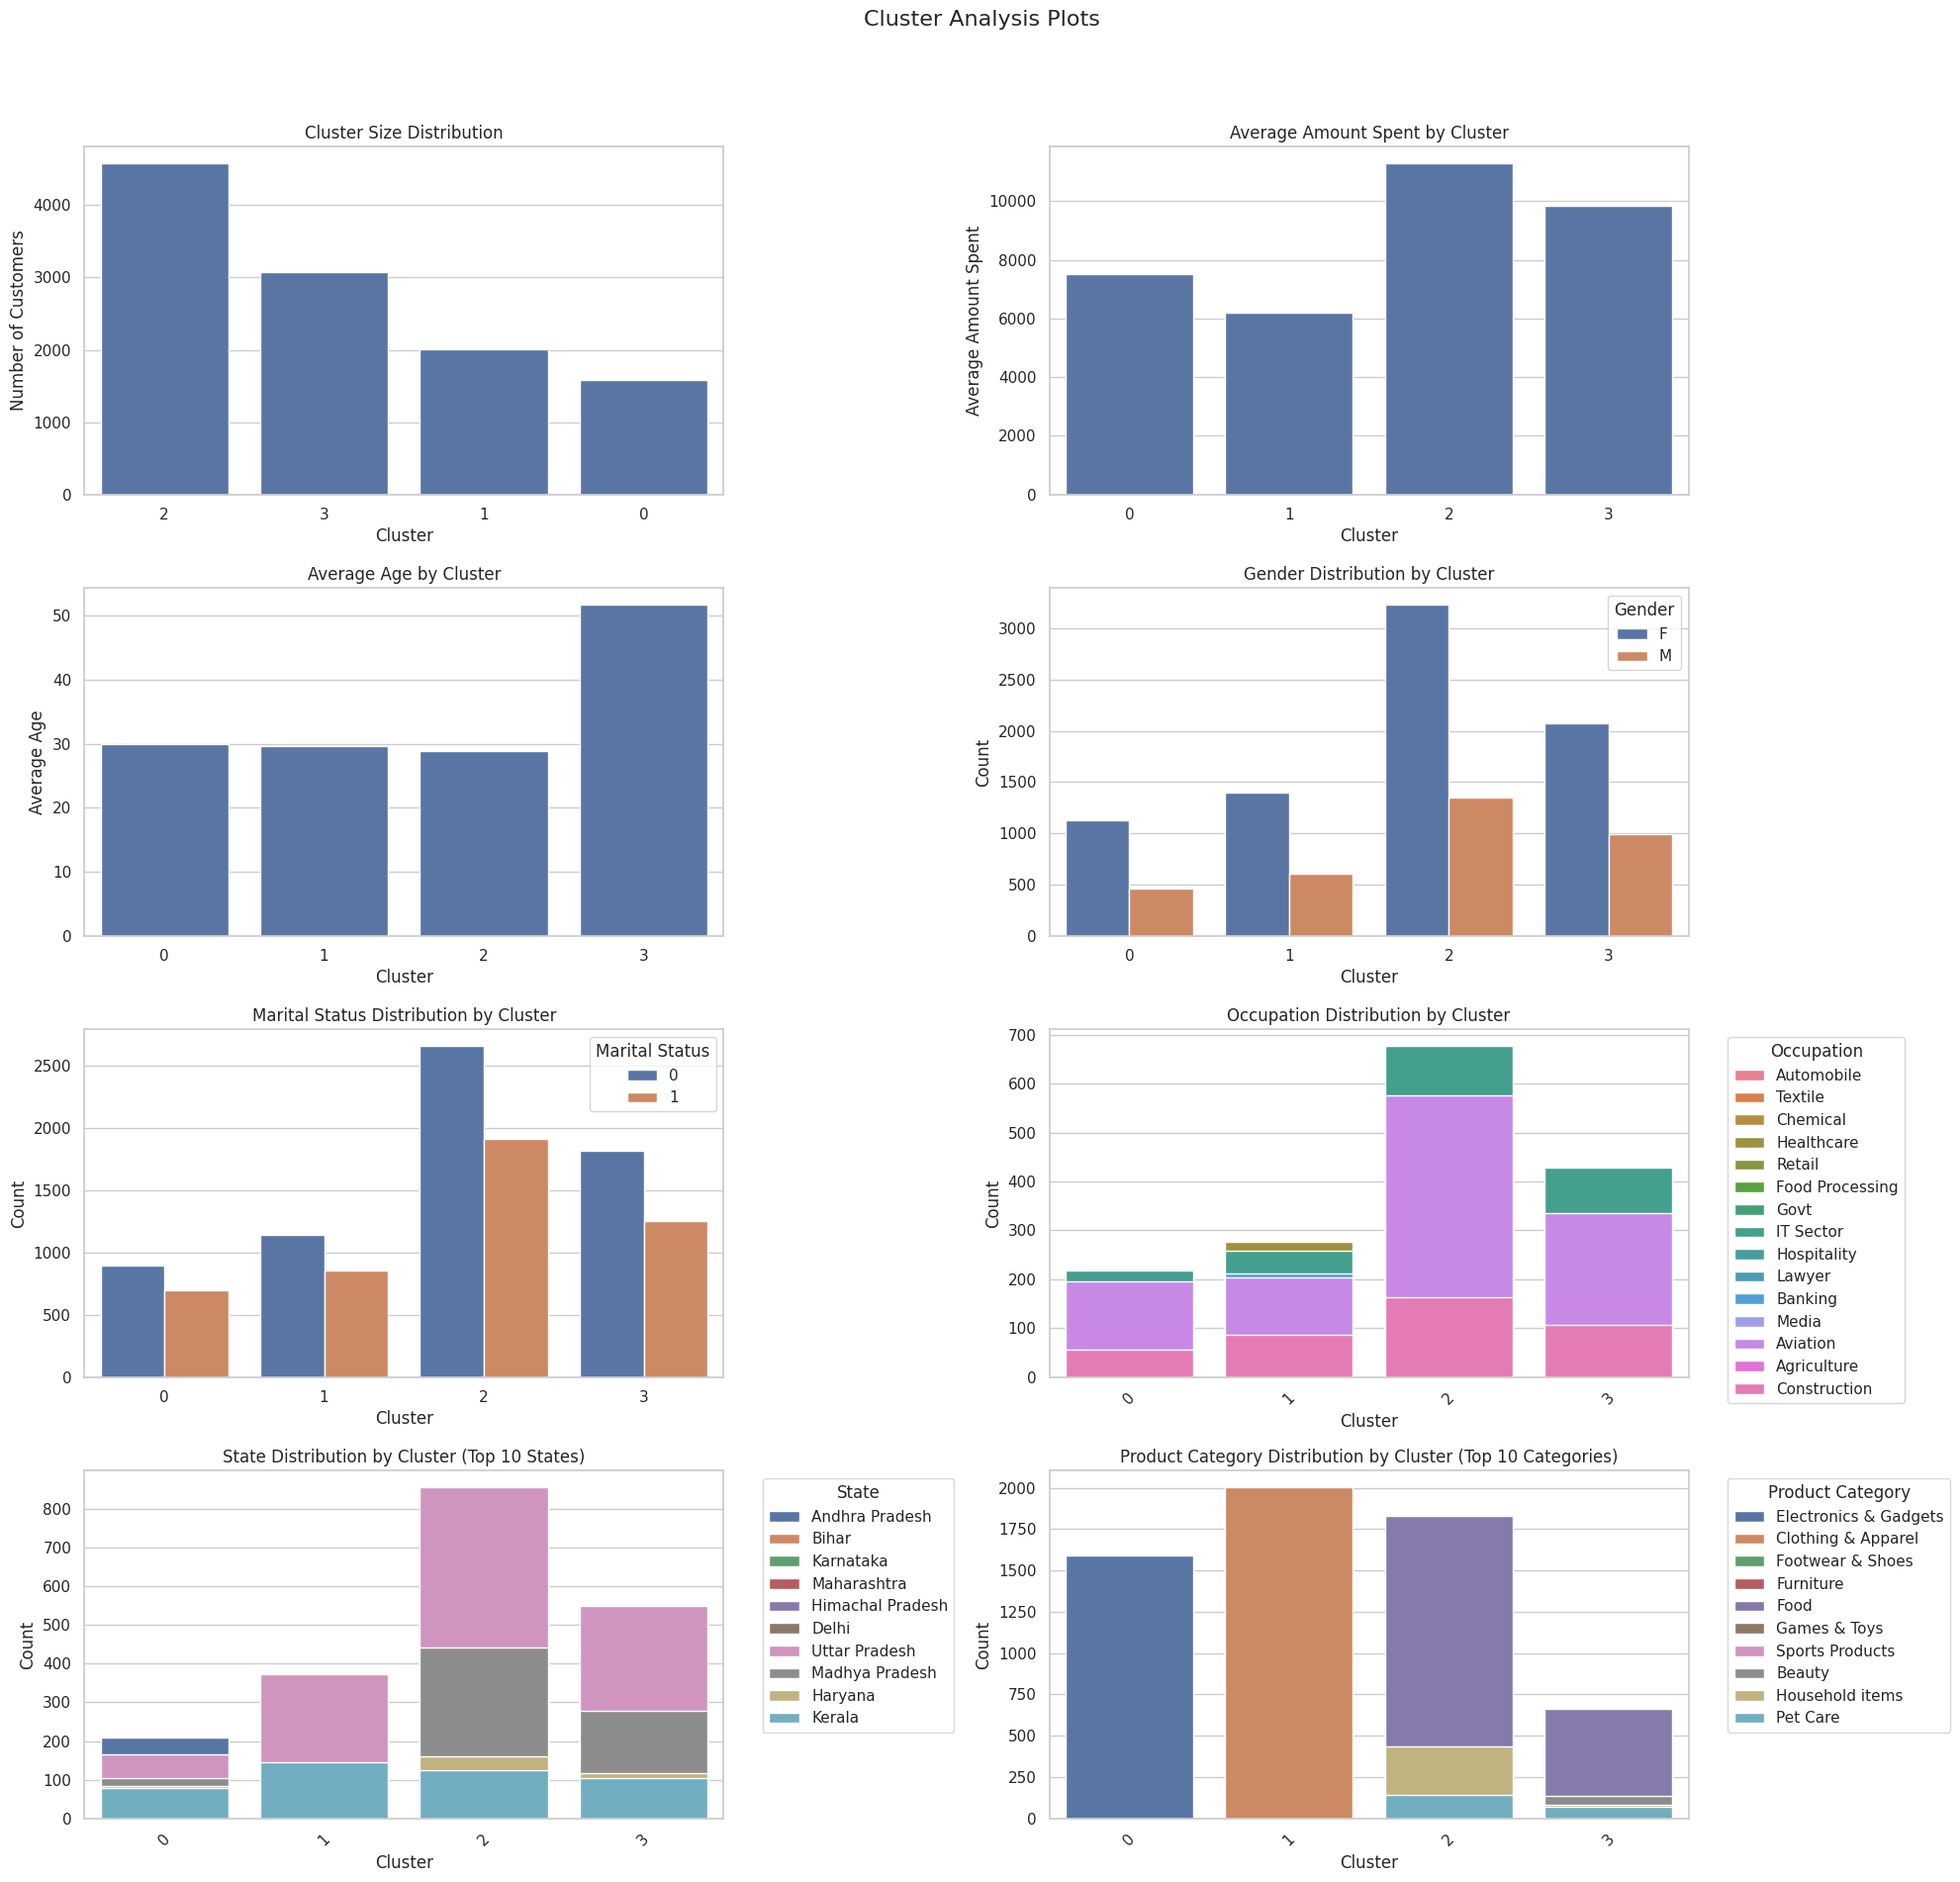

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Create a 4x2 grid for all the subplots
fig, axes = plt.subplots(4, 2, figsize=(20, 20))  # Adjust size as needed
fig.suptitle("Cluster Analysis Plots", fontsize=16)

# 1. Cluster Size Distribution
sns.countplot(x=df['Demographic_Cluster'], order=df['Demographic_Cluster'].value_counts().index, ax=axes[0, 0])
axes[0, 0].set_title('Cluster Size Distribution')
axes[0, 0].set_xlabel('Cluster')
axes[0, 0].set_ylabel('Number of Customers')

# 2. Average Amount Spent by Cluster
sns.barplot(x=amount_summary.index, y=amount_summary.values, ax=axes[0, 1])
axes[0, 1].set_title('Average Amount Spent by Cluster')
axes[0, 1].set_xlabel('Cluster')
axes[0, 1].set_ylabel('Average Amount Spent')

# 3. Age Distribution by Cluster
sns.barplot(x=cluster_summary.index, y=cluster_summary['Age'], ax=axes[1, 0])
axes[1, 0].set_title('Average Age by Cluster')
axes[1, 0].set_xlabel('Cluster')
axes[1, 0].set_ylabel('Average Age')

# 4. Gender Distribution by Cluster
sns.countplot(x='Demographic_Cluster', hue='Gender', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Gender Distribution by Cluster')
axes[1, 1].set_xlabel('Cluster')
axes[1, 1].set_ylabel('Count')
axes[1, 1].legend(title='Gender')

# 5. Marital Status Distribution by Cluster
sns.countplot(x='Demographic_Cluster', hue='Marital_Status', data=df, ax=axes[2, 0])
axes[2, 0].set_title('Marital Status Distribution by Cluster')
axes[2, 0].set_xlabel('Cluster')
axes[2, 0].set_ylabel('Count')
axes[2, 0].legend(title='Marital Status')

# 6. Occupation Distribution by Cluster
sns.countplot(x='Demographic_Cluster', hue='Occupation', data=df, dodge=False, ax=axes[2, 1])
axes[2, 1].set_title('Occupation Distribution by Cluster')
axes[2, 1].set_xlabel('Cluster')
axes[2, 1].set_ylabel('Count')
axes[2, 1].tick_params(axis='x', rotation=45)
axes[2, 1].legend(title='Occupation', bbox_to_anchor=(1.05, 1), loc='upper left')

# 7. State Distribution by Cluster (Top 10 States for readability)
top_states = df['State'].value_counts().index[:10]
sns.countplot(x='Demographic_Cluster', hue='State', data=df[df['State'].isin(top_states)], dodge=False, ax=axes[3, 0])
axes[3, 0].set_title('State Distribution by Cluster (Top 10 States)')
axes[3, 0].set_xlabel('Cluster')
axes[3, 0].set_ylabel('Count')
axes[3, 0].tick_params(axis='x', rotation=45)
axes[3, 0].legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')

# 8. Product Category Distribution by Cluster (Top 10 Categories)
top_categories = df['Product_Category'].value_counts().index[:10]
sns.countplot(x='Demographic_Cluster', hue='Product_Category', data=df[df['Product_Category'].isin(top_categories)], dodge=False, ax=axes[3, 1])
axes[3, 1].set_title('Product Category Distribution by Cluster (Top 10 Categories)')
axes[3, 1].set_xlabel('Cluster')
axes[3, 1].set_ylabel('Count')
axes[3, 1].tick_params(axis='x', rotation=45)
axes[3, 1].legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Leave space for the main title
plt.show()